<img src="Figures/LogoColorHorizontal.png" style="width:200px" align="left">    <img src="Figures/MetaWorksLogo.png" style="width:200px" align="right">

***

# Defining the Metamaterial Element Properties

### May 15, 2020

---

### Contents

* The Lorentzian resonator
* Examining the resonance properties
* Tuning the resonance
* Mapping from ideal polarizability
* Linking the ElementProperties and SystemArchitecture objects

Initialize math and plotting libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
GHz = 1.0E9

## The Lorentzian resonator

For any practical metasurface design, it is essential to incorporate the exact polarizability values associated with each metamaterial resonator. The ElementProperties class provides the functionality needed to generate and manipulate these values. 

The metamaterial element can be modeled as a Lorentzian resonator, with a polarizability of the form

$\alpha_m(f) = \frac{F f^2}{f_0^2 - f^2 + j \gamma f}$

Here, $F$ is the coupling factor, $f$ is the operating frequency, $f_0$ is the resonance frequency, and $\gamma$ is a damping factor (with units of frequency). The coupling factor $F$ has units of ($m^3$). Actual metamaterial resonator designs may have a slightly different functional form, but can generally be fit to a Lorentzian of the above form.

The resonance has the typical behavior of a peak in the magnitude of the polarizability at the resonance frequency $f_0$. The polarizability falls off for frequencies away from the resonance. The half-width of the resonance is defined by the frequency at which the polarizability has fallen to $1/\sqrt{2}$ that of its maximum value. The full width, then is $\Delta \omega$, which is equal to $\Delta \omega = \gamma$. 

An alternative description of the resonance is that of the quality factor, or Q, which is defined as $Q=\omega_0/\Delta \omega$. The Q can also be expressed as $Q = \omega_0/(2 \pi \gamma)$, or $Q = f_0/\gamma$. We can also define $\Gamma = 2 \pi \gamma$, so that $Q = \omega_0/\Gamma$.

## Examining the resonance properties

We can use the ElementProperties class combined with the DataAnalysis class to define and examine various properties of the Lorentzian resonator. First, we must import these classes, then create the appropriate objects.

In [2]:
from ElementProperties import ElementProperties
from DataAnalysis import DataAnalysis
ep = ElementProperties()
dt = DataAnalysis()

When the ElementProperties class is initialized, it assumes a set of default properties that can be summarized as follows:

In [3]:
ep.summarizeLorentzianDipoleParameters()

Lorentzian Dipole Parameters:
Resonance Frequency: 10.0 GHz
Damping Frequency: 0.2 GHz
Oscillator Strength: 1
Quality Factor (Q): 50.0


Since the polarizability is frequency dispersive, it is useful to first visualize the resonance as a function of frequency. For this, we define a set of frequencies over which we will plot the polarizability. We calculate the polarizability at those frequencies:

In [4]:
fv = np.linspace(8*GHz, 12*GHz, 200)
alph = ep.getPolarizability(fv)

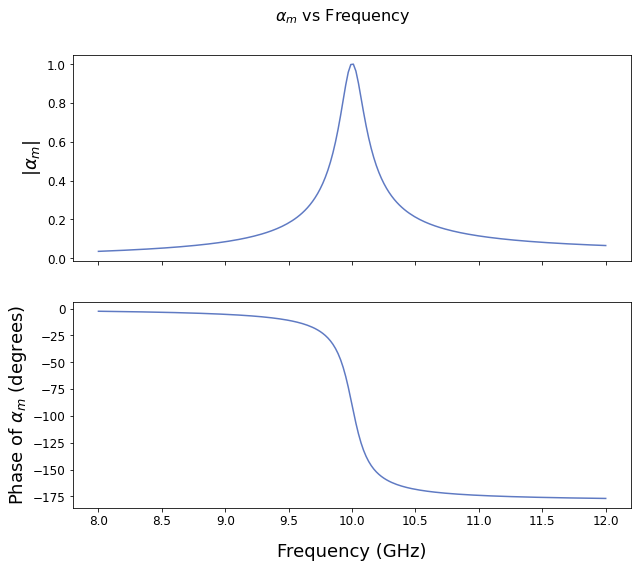

In [5]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

fig.suptitle(r'$\alpha_m$ vs Frequency', fontsize=16, y=.96)

r=1.2
fig.set_size_inches(10,10/r)

dat = np.vstack((fv, np.abs(alph)))
dt.Plot1D(dat,normalize=True,plot_size=9, aspect_ratio=1, vs_frequency=True, 
      ylabel=r'$|\alpha_m|$',
      suppress_plot=True, plot_reference=ax1, palette=8, dpi=100)

dat = np.vstack((fv, np.angle(alph)*180/np.pi))
dt.Plot1D(dat,normalize=False,plot_size=9, aspect_ratio=1, vs_frequency=True, 
      xlabel='Frequency (GHz)', ylabel=r'Phase of $\alpha_m$ (degrees)',
      suppress_plot=True, plot_reference=ax2, palette=8, dpi=100)

## Tuning the resonance

To establish a pattern of antenna weights over the metasurface antenna, the phase and amplitude at each radiating node should be controlled. With passive Lorentzian resonators, it is clear from the above plots that there is some degree of phase and amplitude tuning, though the two are not independent. In addition, the phase range associated with a single resonator lies between 0 and -180 degrees, rather than the full 360 degrees that is available with active phase shifters. The lack of a complete phase shift can be compensated for, to some extent, by the phase advance associated with the feed wave. 

To set values of the phase and/or amplitude at a given operational frequency, the properties of the resonance must be tuned. One direct means of doing this would be to shift the resonance frequency $f_0$. In an actual metamaterial element design, some means of changing the capacitance or inductance of the effective electrical circuit can be introduced, such as liquid crystal, a phase change material, or a varactor. The tuning mechanism can be characterized as shifting the resonance frequency over some bandwidth, which we define as the *tuning bandwidth* $\Delta \omega_t = \omega_h - \omega_l$.

In the following example, we plot the resonance curves as a function of tuning the resonance frequency between 8.5 GHz and 11.5 GHz. At any one frequency, for example 10 GHz, changing the resonance frequency results in a shift in the magnitude and phase at that frequency. A way of visualizing the accessible range of values is on a plot of the polarizability in the complex plane, also shown in the figure below. Here, the polarizability values assume the resonance can be tuned from $f_0 - 2\gamma$ to $f_0+2\gamma$. 

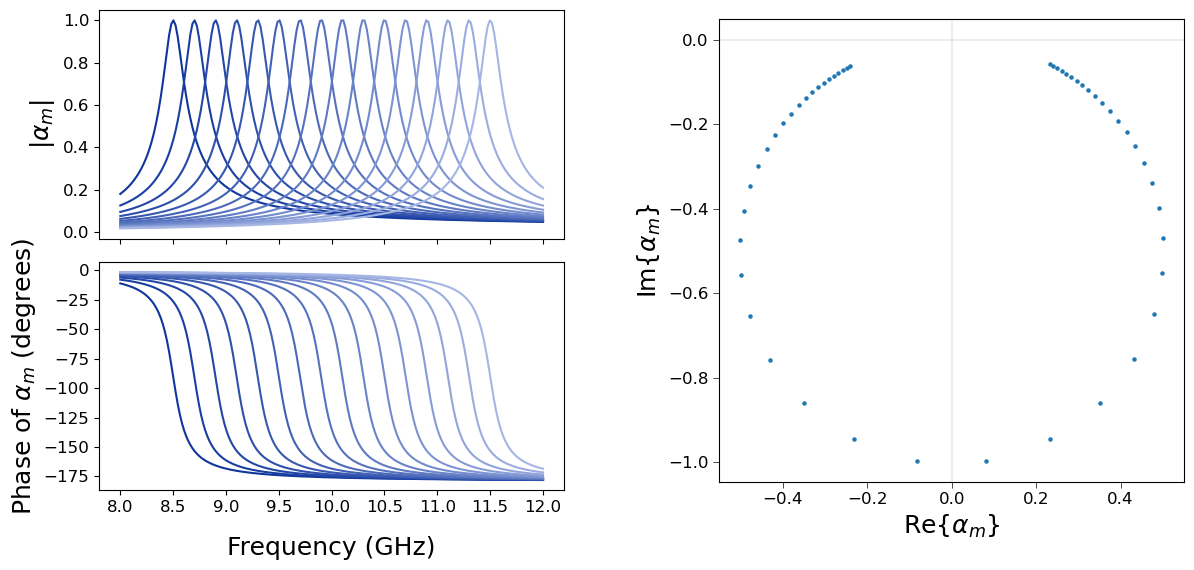

In [6]:
fv = np.linspace(8*GHz, 12*GHz, 200)

fig=plt.figure()
grid = plt.GridSpec(2, 4, wspace=1, hspace=0.1)
ax3=fig.add_subplot(grid[0:, 2:])
ax1=fig.add_subplot(grid[0, 0:2])
ax2=fig.add_subplot(grid[1, 0:2], sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)

r=2.2
fig.set_dpi(100)
fig.set_size_inches(14,14/r)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.abs(alph)))

    dt.Plot1D(dat,normalize=True,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          ylabel=r'$|\alpha_m|$',
          suppress_plot=True, plot_reference=ax1, palette=i, dpi=100)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.angle(alph)*180/np.pi))

    dt.Plot1D(dat,normalize=False,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          xlabel='Frequency (GHz)', ylabel=r'Phase of $\alpha_m$ (degrees)',
          suppress_plot=True, plot_reference=ax2, palette=i, dpi=100)

ep.setLorentzianDipoleParameters(resonance_frequency = 10*GHz)
f0, g, a, q = ep.getLorentzianDipoleParameters()

fv = np.linspace(f0-4*g/2, f0+4*g/2, 50)
alph = ep.getPolarizability(fv, operating_frequency = f0, scan_resonance = True)

dt.PlotComplexPolarizabilityValues(alph, normalize=True, suppress_plot=True, plot_reference=ax3, plot_size=9, dpi=100)

As can be seen from either of the plots, the phase and magnitude change slowly away from the resonance, so that the range of achievable polarizability values is practically limited. This limitation is shown by the incomplete circle in the complex plane. It is worth observing this behavior for a couple of different Q-values.

In [7]:
ep.setLorentzianDipoleParameters(Q=200)
ep.summarizeLorentzianDipoleParameters()

Lorentzian Dipole Parameters:
Resonance Frequency: 10.0 GHz
Damping Frequency: 0.05 GHz
Oscillator Strength: 1
Quality Factor (Q): 200


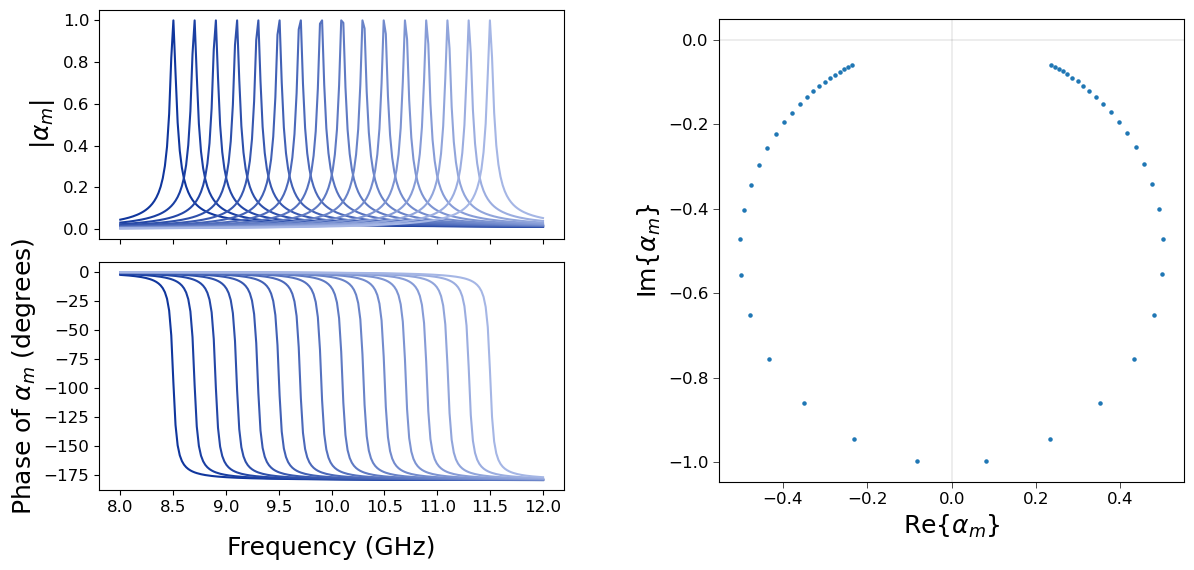

In [8]:
fv = np.linspace(8*GHz, 12*GHz, 200)

fig=plt.figure()
grid = plt.GridSpec(2, 4, wspace=1, hspace=0.1)
ax3=fig.add_subplot(grid[0:, 2:])
ax1=fig.add_subplot(grid[0, 0:2])
ax2=fig.add_subplot(grid[1, 0:2], sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)

r=2.2
fig.set_dpi(100)
fig.set_size_inches(14,14/r)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.abs(alph)))

    dt.Plot1D(dat,normalize=True,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          ylabel=r'$|\alpha_m|$',
          suppress_plot=True, plot_reference=ax1, palette=i, dpi=100)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.angle(alph)*180/np.pi))

    dt.Plot1D(dat,normalize=False,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          xlabel='Frequency (GHz)', ylabel=r'Phase of $\alpha_m$ (degrees)',
          suppress_plot=True, plot_reference=ax2, palette=i, dpi=100)

ep.setLorentzianDipoleParameters(resonance_frequency = 10*GHz)
f0, g, a, q = ep.getLorentzianDipoleParameters()

fv = np.linspace(f0-4*g/2, f0+4*g/2, 50)
alph = ep.getPolarizability(fv, operating_frequency = f0, scan_resonance = True)

dt.PlotComplexPolarizabilityValues(alph, normalize=True, suppress_plot=True, plot_reference=ax3, plot_size=9, dpi=100)

In [9]:
ep.setLorentzianDipoleParameters(Q=25)
ep.summarizeLorentzianDipoleParameters()

Lorentzian Dipole Parameters:
Resonance Frequency: 10.0 GHz
Damping Frequency: 0.4 GHz
Oscillator Strength: 1
Quality Factor (Q): 25


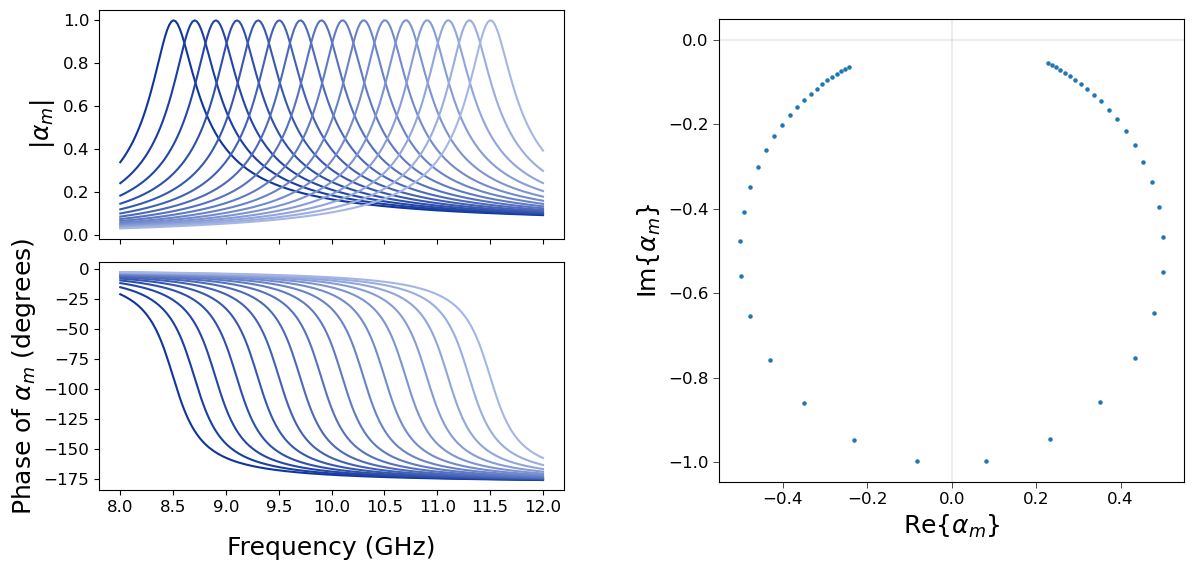

In [10]:
fv = np.linspace(8*GHz, 12*GHz, 200)

fig=plt.figure()
grid = plt.GridSpec(2, 4, wspace=1, hspace=0.1)
ax3=fig.add_subplot(grid[0:, 2:])
ax1=fig.add_subplot(grid[0, 0:2])
ax2=fig.add_subplot(grid[1, 0:2], sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)

r=2.2
fig.set_dpi(100)
fig.set_size_inches(14,14/r)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.abs(alph)))

    dt.Plot1D(dat,normalize=True,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          ylabel=r'$|\alpha_m|$',
          suppress_plot=True, plot_reference=ax1, palette=i, dpi=100)

for i in np.arange(16):
    f0 = 8.5*GHz + (11.5*GHz - 8.5*GHz)*i/15

    ep.setLorentzianDipoleParameters(resonance_frequency = f0)
    alph = ep.getPolarizability(fv)
    dat = np.vstack((fv, np.angle(alph)*180/np.pi))

    dt.Plot1D(dat,normalize=False,plot_size=9, aspect_ratio=2.2, vs_frequency=True, 
          xlabel='Frequency (GHz)', ylabel=r'Phase of $\alpha_m$ (degrees)',
          suppress_plot=True, plot_reference=ax2, palette=i, dpi=100)

ep.setLorentzianDipoleParameters(resonance_frequency = 10*GHz)
f0, g, a, q = ep.getLorentzianDipoleParameters()

fv = np.linspace(f0-4*g/2, f0+4*g/2, 50)
alph = ep.getPolarizability(fv, operating_frequency = f0, scan_resonance = True)

dt.PlotComplexPolarizabilityValues(alph, normalize=True, suppress_plot=True, plot_reference=ax3, plot_size=9, dpi=100)

## Mapping from ideal polarizabilities

Once a dipole type has been set, it will necessarily introduce constraints on the available values of the polarizability. An ideal Lorentzian resonator has amplitude and phase constrained as described above (and also in the notes 'Analyzing Different Modulation Patterns'). It is useful to visual the constraint as a mapping between an ideal set of polarizabilities and the available set, as in the following plot. In this case, the array factor optimization approach has been taken for the mapping. For the *ideal* polarizabilities, a steered beam is assumed so that the ideal case corresponds to a polarizability with a linearly increasing phase and constant amplitude.

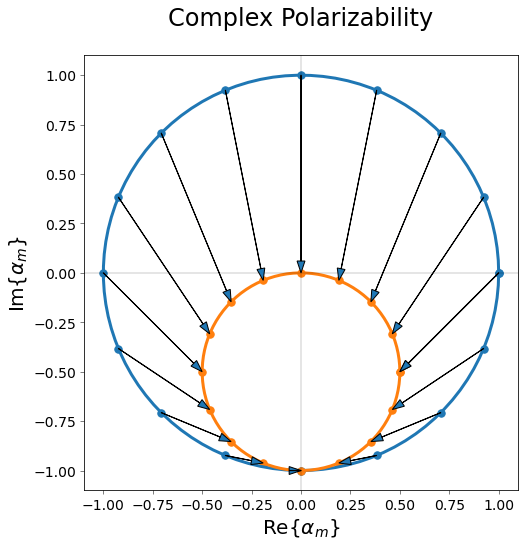

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from DataAnalysis import DataAnalysis
from SystemArchitecture import SystemArchitecture
from ModulationPattern import ModulationPattern

cm = 0.01
GHz = 10e9

sa1=SystemArchitecture()
sa2=SystemArchitecture()
mp1=ModulationPattern(sa1, modulation_type='ideal')
mp2=ModulationPattern(sa2, modulation_type='af-optimized')
dt=DataAnalysis()

sa1.guideIndex = 1.0
wv = sa1.wavelength_op
spc = wv/16
sa1.MakeLinearArray(spc, aperture_size = wv)
mp1.DirectedBeam(sa1,0)

sa2.guideIndex = 1.0
wv = sa2.wavelength_op
sa2.MakeLinearArray(spc, aperture_size = wv)
sa2.dipoleType = 'ideal-constrained-lorentzian'
mp2.DirectedBeam(sa2,0)

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

theta = np.linspace(0, 2*np.pi, 100)
r = 1
xc = r*np.cos(theta)
yc = r*np.sin(theta)

ax.plot(xc,yc, linewidth=3)

r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

ax.plot(xc,yc, linewidth=3)

dt.PlotComplexPolarizabilityValues(sa1.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=125, marker_size=55)
dt.PlotComplexPolarizabilityValues(sa2.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=125, marker_size=55, title="Complex Polarizability")

i=0
for z in sa1.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = np.real(sa2.alpha[i])-np.real(z)
    dy = np.imag(sa2.alpha[i])-np.imag(z)
    plt.arrow(x,y,dx,dy,head_width=0.04,zorder=10, length_includes_head=True, head_starts_at_zero=False)
    i=i+1

plt.show()

A physical resonator will have limits on its tuning range that will result in limits on the available polarizabilities. That means part of the orange circle in the above figure will be missing, since the curve above assumes that the polarizability can have any value consistent with causality.

A simple means of inputting the constraints of an actual resonator is simply to limit the minimum and maximum values of the phase of $\alpha_m$, which occur at the extrema of the frequency tuning range. This is true for an ideal Lorentzian resonator, which has a monotonically decreasing phase as shown above. The physical element properties must be thus brought into the SystemArchitecture object, wherein the operating frequency and other key parameters are defined for the system.

## Linking the ElementProperties and SystemArchitecture objects 

Once the dipole positions are laid out in the SystemArchitecture object, their properties must be assigned. If the dipoles are ideal (either unconstrained or ideal Lorentzian) there is no further description needed and polarizabilities can be assigned via the ModulationPattern object. However, for physical dipoles, an ElementProperty object is created through which the resonance properties of the elements (and their tuning ranges) can be assigned.

When the range of tuning is limited, a section of the polarizability curve is absent, as shown below. In this example, the operating frequency is 10 GHz, with a tuning range of 400 MHz (from 9.8 GHz to 10.2 GHz). The modulation approach is the array-factor optimized. Because not all polarizability values are available, a section of ideal polarizabilties is arbitrarily mapped to either of the end points of the curve.

The ElementProperties object is accessed within the SystemArchitecture object. When a dipole type is selected that requires the physical dipole, such as the *lorentzian-limited-tuning*, the ElementProperties object is used. The properties of the dipole can then be accessed through the .dipoleProperties.setLorentzianDipoleParameters() method, as shown below. In this example, the tuning range is specified. The ModulationPattern object uses the physical dipole parameters if the requisite dipole type is selected.

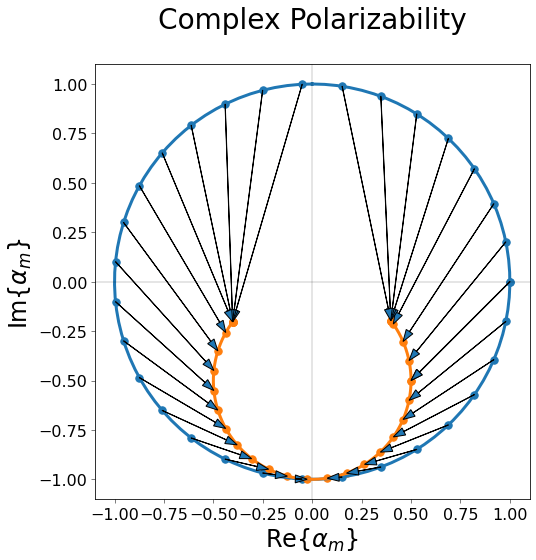

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from DataAnalysis import DataAnalysis
from SystemArchitecture import SystemArchitecture
from ModulationPattern import ModulationPattern
from SystemOutput import SystemOutput

cm = 0.01
GHz = 1e9

# In this example, the ideal polarizabilities are shown mapped to the available polarizabilities.
sa1=SystemArchitecture()
sa2=SystemArchitecture()
mp1=ModulationPattern(sa1, modulation_type='ideal')
mp2=ModulationPattern(sa2, modulation_type='af-optimized')
dt=DataAnalysis()

sa1.guideIndex = 1.0
wv = sa1.wavelength_op
spc = wv/31
sa1.MakeLinearArray(spc, aperture_size = wv)
mp1.DirectedBeam(sa1,0)

sa2.guideIndex = 1.0
wv = sa2.wavelength_op
sa2.MakeLinearArray(spc, aperture_size = wv)
sa2.dipoleType = 'lorentzian-limited-tuning'
sa2.dipoleProperties.setLorentzianDipoleParameters(tuning_frequency_low=9.8*GHz, tuning_frequency_high=10.2*GHz, operating_frequency=sa2.freq_op)
mp2.DirectedBeam(sa2,0)

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

theta = np.linspace(-270*np.pi/180, 90*np.pi/180, 100)
r = 1
xc = r*np.cos(theta)
yc = r*np.sin(theta)

ax.plot(xc,yc, linewidth=3)

dt.PlotComplexPolarizabilityValues(sa1.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=150, marker_size=55)
dt.PlotComplexPolarizabilityValues(sa2.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=150, marker_size=55, title="Complex Polarizability")


i=0
for z in sa1.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = np.real(sa2.alpha[i])-np.real(z)
    dy = np.imag(sa2.alpha[i])-np.imag(z)
    plt.arrow(x,y,dx,dy,head_width=0.04,zorder=10, length_includes_head=True, head_starts_at_zero=False)
    i=i+1

u = sa2.dipoleProperties.minAngle
theta_min = np.arccos(2*np.sin(u)*np.cos(u))*180/np.pi

u = sa2.dipoleProperties.maxAngle
theta_max = np.arccos(2*np.sin(u)*np.cos(u))*180/np.pi-360

theta = np.linspace(theta_min*np.pi/180, theta_max*np.pi/180, 100)
r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

ax.plot(xc,yc, linewidth=3)

plt.show()